In [1]:
import pandas as pd


stations_df = pd.read_csv('stations.csv')


station_month_df = pd.read_csv('station_month.csv')


In [2]:
stations_df

,Station,Name,City,State,Type
0,DEL01,Dilshad Garden,Delhi,Delhi,Silence
1,DEL02,"CPCB, HQ",Delhi,Delhi,Commercial
2,DEL03,"DCE, Bawana",Delhi,Delhi,Silence
3,DEL04,ITO,Delhi,Delhi,Commercial
4,DEL05,"NSIT, Dwarka",Delhi,Delhi,Silence
...,...,...,...,...,...
65,MUM06,Kandivali,Mumbai,Maharashtra,Industrial
66,MUM07,Powai,Mumbai,Maharashtra,Industrial
67,MUM08,Chembur,Mumbai,Maharashtra,Residential
68,MUM09,Andheri,Mumbai,Maharashtra,Industrial


In [3]:
station_month_df

,Station,Year,Month,Day,Night,DayLimit,NightLimit
0,BEN01,2011,2,66.0,56.0,55,45
1,BEN01,2011,3,66.0,58.0,55,45
2,BEN01,2011,4,66.0,57.0,55,45
3,BEN01,2011,5,66.0,56.0,55,45
4,BEN01,2011,6,67.0,57.0,55,45
...,...,...,...,...,...,...,...
5000,MUM10,2018,8,73.0,69.0,65,55
5001,MUM10,2018,9,72.0,68.0,65,55
5002,MUM10,2018,10,73.0,68.0,65,55
5003,MUM10,2018,11,72.0,68.0,65,55


In [4]:

merged_df = pd.merge(station_month_df, stations_df, on='Station', how='inner')


merged_df


,Station,Year,Month,Day,Night,DayLimit,NightLimit,Name,City,State,Type
0,BEN01,2011,2,66.0,56.0,55,45,BTM,Bengaluru,Karnataka,Residential
1,BEN01,2011,3,66.0,58.0,55,45,BTM,Bengaluru,Karnataka,Residential
2,BEN01,2011,4,66.0,57.0,55,45,BTM,Bengaluru,Karnataka,Residential
3,BEN01,2011,5,66.0,56.0,55,45,BTM,Bengaluru,Karnataka,Residential
4,BEN01,2011,6,67.0,57.0,55,45,BTM,Bengaluru,Karnataka,Residential
...,...,...,...,...,...,...,...,...,...,...,...
5000,MUM10,2018,8,73.0,69.0,65,55,CST,Mumbai,Maharashtra,Commercial
5001,MUM10,2018,9,72.0,68.0,65,55,CST,Mumbai,Maharashtra,Commercial
5002,MUM10,2018,10,73.0,68.0,65,55,CST,Mumbai,Maharashtra,Commercial
5003,MUM10,2018,11,72.0,68.0,65,55,CST,Mumbai,Maharashtra,Commercial


In [5]:

merged_df.isnull().sum()


Station        0
Year           0
Month          0
Day            3
Night         10
DayLimit       0
NightLimit     0
Name           0
City           0
State          0
Type           0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
merged_df['Day'] = merged_df['Day'].interpolate()
imputer = SimpleImputer(strategy='mean')
merged_df[['Night']] = imputer.fit_transform(merged_df[['Night']])


In [7]:
merged_df.isnull().sum()


Station       0
Year          0
Month         0
Day           0
Night         0
DayLimit      0
NightLimit    0
Name          0
City          0
State         0
Type          0
dtype: int64

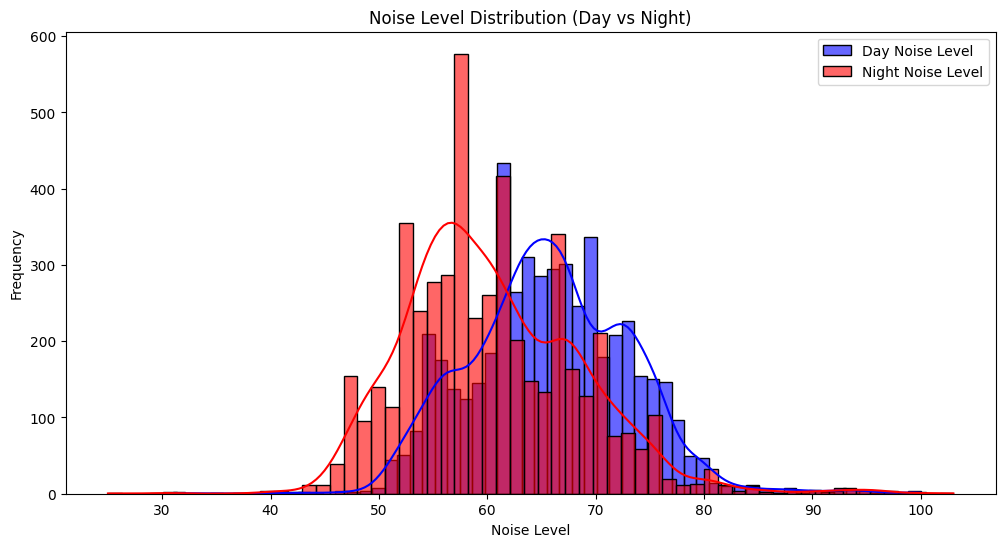

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
sns.histplot(merged_df['Day'], kde=True, label='Day Noise Level', color='blue', alpha=0.6)
sns.histplot(merged_df['Night'], kde=True, label='Night Noise Level', color='red', alpha=0.6)
plt.title('Noise Level Distribution (Day vs Night)')
plt.xlabel('Noise Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [10]:

merged_df['Year'] = merged_df['Year'].astype(int)
merged_df['Month'] = merged_df['Month'].astype(int)


merged_df['Date'] = pd.to_datetime(merged_df[['Year', 'Month']].assign(DAY=1))


print(merged_df[['Year', 'Month', 'Date']].head())


   Year  Month       Date
0  2011      2 2011-02-01
1  2011      3 2011-03-01
2  2011      4 2011-04-01
3  2011      5 2011-05-01
4  2011      6 2011-06-01


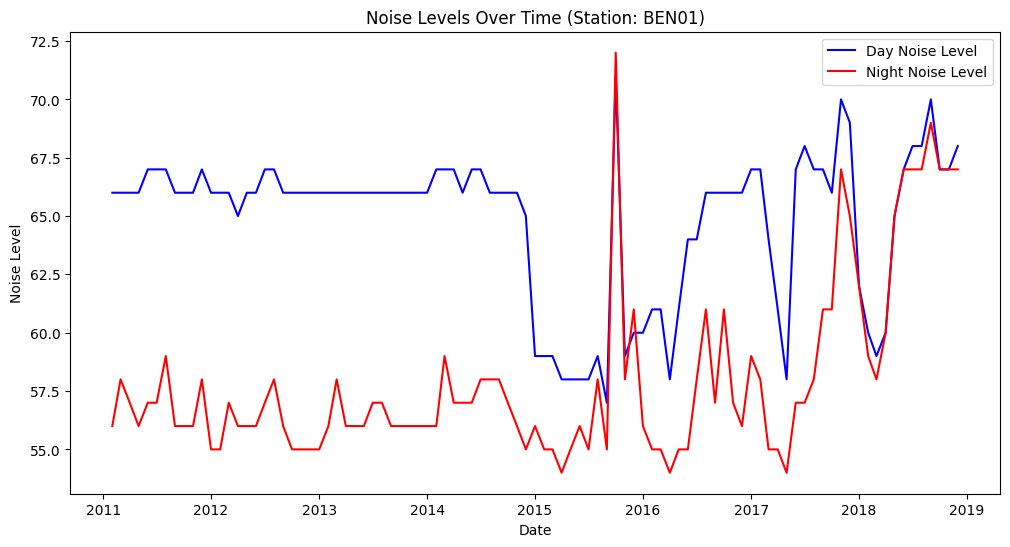

In [11]:

station_data = merged_df[merged_df['Station'] == 'BEN01'] 
plt.figure(figsize=(12,6))
plt.plot(station_data['Date'], station_data['Day'], label='Day Noise Level', color='blue')
plt.plot(station_data['Date'], station_data['Night'], label='Night Noise Level', color='red')
plt.title('Noise Levels Over Time (Station: BEN01)')
plt.xlabel('Date')
plt.ylabel('Noise Level')
plt.legend()
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_cols = ['Station', 'Name', 'City', 'State', 'Type']

for col in categorical_cols:
    merged_df[col] = label_encoder.fit_transform(merged_df[col])


print(merged_df.head())


   Station  Year  Month   Day  Night  DayLimit  NightLimit  Name  City  State  \
0        0  2011      2  66.0   56.0        55          45     5     0      1   
1        0  2011      3  66.0   58.0        55          45     5     0      1   
2        0  2011      4  66.0   57.0        55          45     5     0      1   
3        0  2011      5  66.0   56.0        55          45     5     0      1   
4        0  2011      6  67.0   57.0        55          45     5     0      1   

   Type       Date  
0     2 2011-02-01  
1     2 2011-03-01  
2     2 2011-04-01  
3     2 2011-05-01  
4     2 2011-06-01  


In [16]:
from sklearn.model_selection import train_test_split

y = merged_df['Night']  
X = merged_df.drop(columns=['Night', 'Station', 'City', 'State', 'Date'])  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(4004, 7) (1001, 7)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')


Mean Absolute Error: 1.6108231568231568
R2 Score: 0.8844543567770285


In [19]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(RandomForestRegressor(n_estimators=100, max_depth=20), X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validation scores: ", cv_scores)


Cross-validation scores:  [-1.64264172 -1.54120347 -1.7676173  -1.65859118 -1.67907858]


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


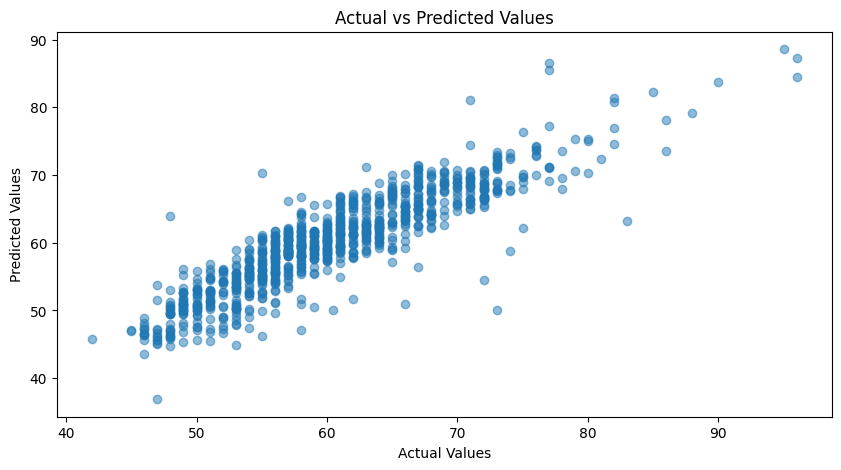

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(y_test.values.flatten(), y_pred.flatten(), alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Absolute Error: 2.67250770734529
Mean Squared Error: 12.740177512887628
Root Mean Squared Error: 3.569338525957944
R-squared: 0.8043658445149954


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)  # X contains your features


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validation Mean MAE: {-cv_scores.mean()}")
print(f"Cross-validation Std MAE: {cv_scores.std()}")


Mean Absolute Error: 1.5925965503205495
R2 Score: 0.8887149149519216
Cross-validation Mean MAE: 2.2798828309740635
Cross-validation Std MAE: 0.18337479900754408
